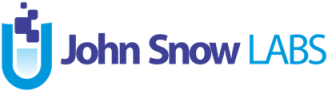

# 🚀 JohnSnowLabs Medical LLM Inference Server

### 🔄 The images required to run the llm have been pulled from 
 👉 [Docker Hub](https://hub.docker.com/r/johnsnowlabs/jsl-llms):


### 🐳 The containers are running at system startup


Check running the containers with:

```bash
docker ps
```
It should show 2 containers running, johnsnowlabs/jsl-llms:marketplace runs the model. 
ghcr.io/open-webui/open-webui:main runs webui to interact with the model.

```
CONTAINER ID   IMAGE                                COMMAND                  CREATED      STATUS                            PORTS                                         NAMES
4dbe81768b8b   johnsnowlabs/jsl-llms:marketplace    "./entrypoint.sh --m…"   2 days ago   Up 2 minutes (health: starting)   0.0.0.0:8080->8080/tcp, [::]:8080->8080/tcp   med-llm-cmp-jsl-llms-1
684bf3801bf8   ghcr.io/open-webui/open-webui:main   "bash start.sh"          2 days ago   Up 2 minutes (healthy)            0.0.0.0:3000->8080/tcp, [::]:3000->8080/tcp   open-webui
```
---

### 📜 View Container Logs

You can monitor the container logs with:

```bash
docker logs <container-id>
```

The logs will show important information such as:
- Model initialization and loading progress
- License validation status
- Server startup confirmation
- Memory usage and GPU configuration
- Model task capabilities
- Available API endpoints and routes
- Health check status


Example log entry for successful startup of johnsnowlabs/jsl-llms:marketplace:
```bash
INFO: Application startup complete.
llm-service [INFO] Server is healthy and model is loaded
INFO: Started server process [1]
INFO:     127.0.0.1:42154 - "GET /health HTTP/1.1" 200 OK
```

Once you see these messages, the service is ready to accept requests! 🎉

## Imports

In [ ]:
import json
import requests

## Initial setup

In [2]:
prompt1 = "How do emerging mRNA technologies compare to traditional vaccine approaches for disease prevention?"

prompt2 = """Patients with xeroderma pigmentosum develop skin cancer when they are exposed to sunlight because they have a deficiency in:

A. An enzyme essential to repair mismatched bases.
B. UV specific endonuclease.
C. DNA polymerase I.
D. DNA polymerase III.
E. Glycosylase that removes uracil bases from DNA."""

system_prompt = """You are a medical expert that reviews the problem, does reasoning, and then gives a final answer.
Strictly follow this exact format for giving your output:

<think>
reasoning steps
</think>

**Final Answer**: [Conclusive Answer]"""

# Health & Version:

In [3]:
url = "http://localhost:8080/health"
response = requests.get(url)
print("Health:", response.status_code, response.text)

Health: 200 


In [4]:
url = "http://localhost:8080/ping"
response = requests.post(url)
print("Ping:", response.status_code, response.text)

Ping: 200 


In [5]:
url = "http://localhost:8080/version"
response = requests.get(url)
print("Version:", response.json())

Version: {'version': '0.7.3'}


# Core Functionality:

### List available models

In [6]:
url = "http://localhost:8080/v1/models"
response = requests.get(url)
print("Models:", response.json())

Models: {'object': 'list', 'data': [{'id': 'Medical-Reasoning-LLM-14B', 'object': 'model', 'created': 1744013042, 'owned_by': 'vllm', 'root': 'Medical-Reasoning-LLM-14B', 'parent': None, 'max_model_len': 32768, 'permission': [{'id': 'modelperm-c3ca91b2243847c8986f1cee88189fd8', 'object': 'model_permission', 'created': 1744013042, 'allow_create_engine': False, 'allow_sampling': True, 'allow_logprobs': True, 'allow_search_indices': False, 'allow_view': True, 'allow_fine_tuning': False, 'organization': '*', 'group': None, 'is_blocking': False}]}]}


## Non-Streaming Responses

In [8]:
def get_completion_response(url, payload):
    """
    Handles non-streaming responses from both `/v1/chat/completions` and `/v1/completions`.

    Args:
        url (str): The endpoint URL.
        payload (dict): The request payload.

    Returns:
        str: The generated text (chat or completion).
    """
    response = requests.post(url, json=payload)

    if response.status_code == 200:
        data = response.json()
        choices = data.get("choices", [{}])

        if "message" in choices[0]:
            return choices[0]["message"].get("content", "")

        return choices[0].get("text", "")
    else:
        print("Error:", response.status_code, response.text)
        return ""

### Chat completions

In [11]:
url = "http://localhost:8080/v1/chat/completions"
payload = {
    "model": "Medical-LLM-Small",
    "messages": [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt1}
    ],
    "max_tokens": 2048,
    "temperature": 0.8,
    "top_p": 0.95,
}

response = get_completion_response(url, payload)
print(response)

<think>
Emerging mRNA technologies represent a significant advancement in vaccine development, offering several advantages over traditional vaccine approaches, such as live-attenuated, inactivated, and subunit vaccines. Here’s a comparative analysis:

### Mechanism of Action
- **mRNA Vaccines**: These vaccines introduce a small piece of the genetic code (mRNA) that instructs cells to produce a specific viral protein. The immune system then recognizes this protein as foreign and mounts a protective response.
- **Traditional Vaccines**: These vaccines typically introduce either weakened (attenuated) or killed (inactivated) pathogens, or specific proteins/subunits derived from the pathogen.

### Development Speed and Flexibility
- **mRNA Vaccines**: mRNA vaccines can be developed more rapidly and with greater flexibility. The genetic sequence of a new pathogen can be quickly identified and used to create an mRNA vaccine, potentially allowing for quicker responses to emerging threats.
- **

For additional parameters and details, refer to:

- [ChatCompletionRequest](https://github.com/vllm-project/vllm/blob/v0.8.5/vllm/entrypoints/openai/protocol.py#L232)
- [OpenAI’s Chat Completions API](https://platform.openai.com/docs/api-reference/chat/create)

### Text completions

In [12]:
url = "http://localhost:8080/v1/completions"
payload = {
    "model": "Medical-LLM-Small",
    "prompt": f"{system_prompt}\n\nUser: {prompt2}\n\nAssistant:",
    "max_tokens": 2048,
    "temperature": 0.8,
    "top_p": 0.95,
}

response = get_completion_response(url, payload)
print(response)

 <think>
Xeroderma pigmentosum is a rare genetic disorder characterized by an inability to repair DNA damage caused by ultraviolet (UV) light. This results in severe sensitivity to sunlight and an increased risk of developing skin cancers. The underlying cause of this condition is a deficiency in enzymes involved in the nucleotide excision repair (NER) pathway.

The NER pathway involves several key enzymes, including UV-specific endonucleases. These endonucleases are responsible for recognizing and cutting out damaged sections of DNA, allowing for the repair process to proceed. In patients with xeroderma pigmentosum, the absence or dysfunction of these endonucleases leads to the accumulation of DNA damage, particularly from UV exposure, which in turn predisposes them to the development of skin cancers.

Given the options provided:
A. An enzyme essential to repair mismatched bases - This refers to the mismatch repair pathway, which is not directly involved in repairing UV-induced DNA da

For further details and additional parameters, see:

- [CompletionRequest](https://github.com/vllm-project/vllm/blob/v0.8.5/vllm/entrypoints/openai/protocol.py#L730)
- [OpenAI’s Completions API](https://platform.openai.com/docs/api-reference/completions/create)

# Streaming Responses

In [ ]:
def stream_response(url, payload):
    """
    Handles streaming responses from both `/v1/chat/completions` and `/v1/completions`.

    Args:
        url (str): The API endpoint URL.
        payload (dict): The JSON payload for the request.

    Prints the reconstructed streamed output in real-time.
    """
    response = requests.post(url, json=payload, stream=True)

    for chunk in response.iter_lines():
        if chunk:
            decoded = chunk.decode("utf-8")
            if decoded.startswith("data: "):
                data = decoded[len("data: "):]
                if data.strip() == "[DONE]":
                    break
                try:
                    parsed = json.loads(data)
                    choices = parsed.get("choices", [])
                    if not choices:
                        continue
                    choice = choices[0]

                    content = choice.get("delta", {}).get("content") or choice.get("text")
                    if content:
                        print(content, end="", flush=True)
                except (KeyError, json.JSONDecodeError):
                    continue


### Chat completions

In [14]:
url = "http://localhost:8080/v1/chat/completions"

payload = {
    "model": "Medical-LLM-Small",
    "messages": [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt1}
    ],
    "max_tokens": 2048,
    "temperature": 0.8,
    "top_p": 0.95,
    "stream": True
}

stream_response(url, payload)

<think>
Emerging mRNA technologies represent a significant advancement in vaccine development, offering several advantages over traditional approaches like inactivated, attenuated, or subunit vaccines. Here's a comparison:

1. **Mechanism of Action**:
   - **mRNA Vaccines**: These vaccines deliver a small piece of genetic material (mRNA) into cells, instructing them to produce a harmless piece of a virus or bacteria. This mimics an infection and teaches the immune system to recognize and fight the actual pathogen.
   - **Traditional Vaccines**: Traditional vaccines can include inactivated or attenuated whole viruses, purified proteins (subunits), or parts of the virus/bacteria. These methods aim to elicit an immune response without causing the disease.

2. **Safety and Efficacy**:
   - **mRNA Vaccines**: mRNA vaccines have demonstrated high efficacy and safety profiles. They are non-infectious and cannot integrate into the genome, reducing the risk of adverse effects.
   - **Traditiona

### Text completions

In [15]:
url = "http://localhost:8080/v1/completions"

payload = {
    "model": "Medical-LLM-Small",
    "prompt": f"{system_prompt}\n\nUser: {prompt2}\n\nAssistant:",
    "max_tokens": 2048,
    "temperature": 0.8,
    "top_p": 0.95,
    "stream": True
}

stream_response(url, payload)

 <think>
Xeroderma pigmentosum (XP) is a rare genetic disorder characterized by extreme sensitivity to ultraviolet (UV) light. People with XP are at high risk of developing skin cancer and other skin damage because their cells have an impaired ability to repair DNA damage caused by UV radiation.

The primary mechanism underlying XP is a deficiency in the nucleotide excision repair (NER) pathway. This repair pathway is responsible for recognizing and removing bulky DNA lesions, such as those formed by UV light. In XP, mutations in genes encoding proteins involved in the NER pathway lead to an inability to efficiently repair these lesions, resulting in the accumulation of DNA damage.

The NER pathway involves multiple steps, including the recognition of damaged DNA, the unwinding of the DNA helix around the lesion, the removal of the damaged segment, and the synthesis of the replacement DNA. A key component of this pathway is the endonuclease that specifically recognizes and cleaves the 


## Additional Endpoints  
You can access other API routes depending on the model's capabilities. Check your server startup logs for supported tasks and their corresponding endpoints.

The full list of available routes is logged during service initialization.